In [1]:
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
from PIL import Image, ImageOps
import matplotlib as mpl 
mpl.rcParams['animation.ffmpeg_path'] = r'D:\ffmpeg\bin\ffmpeg.exe'

from sktrajectory import SKTrajectory
from wrangler import Wrangler

In [2]:
pdf = Wrangler.load_pickle('data/pdf.pkl')
nndf = Wrangler.load_pickle('data/nndf.pkl')

l_df = pd.read_csv('bsc-3m/signals_dense.csv')
l_xy = Wrangler.load_pickle('bsc-3m/signal_lines_true.pickle')

clf = Wrangler.load_pickle('models/model.pkl')

In [3]:
t = SKTrajectory(pdf.iloc[0], l_df, l_xy, clf)
t.init_sim(0)
for i in range(1,50):
    t.step(i)

In [105]:
def rotate(v, alpha):
    matrix = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
    return v @ matrix

In [90]:
def normalize(v):
    d = np.linalg.norm(v,2)
    return v / d

In [145]:
def get_polygons(v1, v_prev, num, k=500):
    polygons = []
    for i in range(0, num*2, 2):
        alpha = np.pi/num
        v = v1 - v_prev
        v = normalize(v)
        v = rotate(v, alpha*i)
        p1 = Point(v1)
        p2 = Point(v1 + rotate(v, alpha)*k)
        p3 = Point(v1 + rotate(v, -alpha)*k)
        poly = Polygon([p1,p2,p3])
        polygons.append(poly)
    return polygons

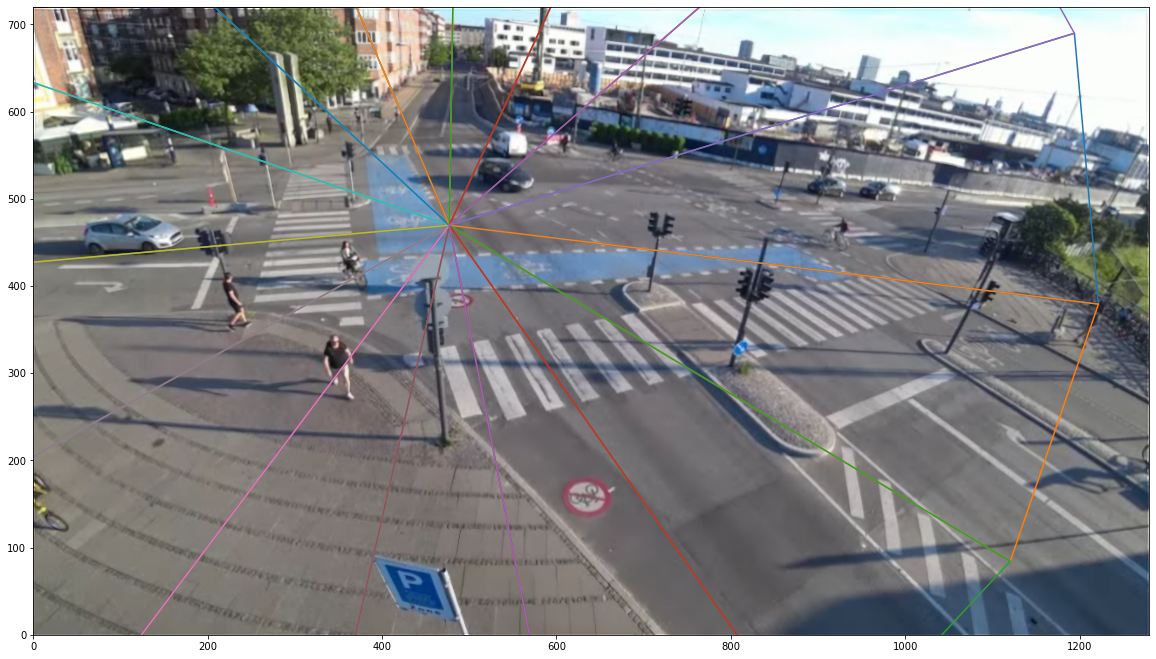

In [210]:
poly = Polygon([p1,p2,p3])
x,y = poly.exterior.xy


fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
img = Image.open("intersection2.png")
img = ImageOps.flip(img)
im = ax.imshow(img, origin='lower')

ax.scatter([t.xy_hist[-1][0]], [t.xy_hist[-1][1]], c='r')

v1 = np.array(t.xy_hist[-1])
v2 = np.array(t.xy_hist[-2])
x,y = LineString([v1, v2]).xy
ax.plot(x,y, c='r')

polygons = get_polygons(v1, v2, 15, k=750)
for p in polygons:
    x,y = p.exterior.xy
    ax.plot(x,y)

In [153]:
asd = Point(800, 300)
for i, p in enumerate(polygons):
    if p.contains(asd):
        print('zone', i, p1.distance(asd))
    else:
        print('zone', i, False)

zone 0 False
zone 1 False
zone 2 364.77546244211754
zone 3 False
zone 4 False
zone 5 False
zone 6 False
zone 7 False
zone 8 False
zone 9 False
zone 10 False
zone 11 False
zone 12 False
zone 13 False
zone 14 False
zone 15 False
zone 16 False
zone 17 False
zone 18 False
zone 19 False
zone 20 False
zone 21 False
zone 22 False
zone 23 False
zone 24 False


In [171]:
pdf = Wrangler.load_pickle('data/pdf_test.pkl')
row = pdf.iloc[8]

In [204]:
row = pdf.iloc[12]

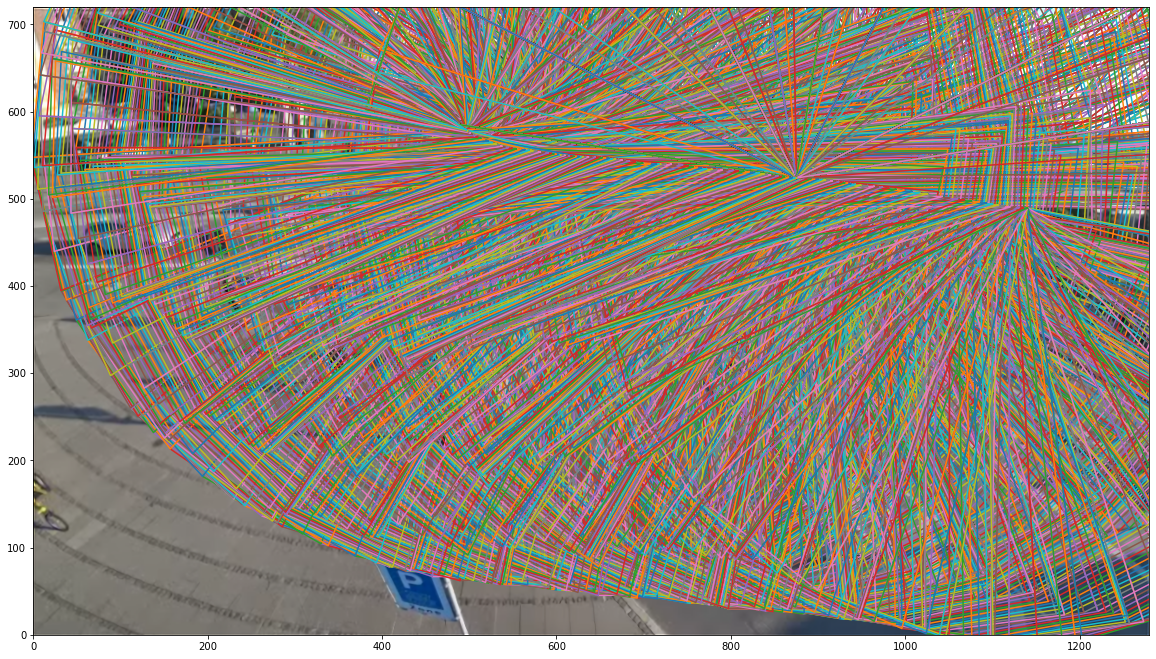

In [187]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
img = Image.open("intersection2.png")
img = ImageOps.flip(img)
im = ax.imshow(img, origin='lower')

ax.scatter(row['x'], row['y'], c='r')

for zone in ['zone_' + str(i) for i in range(20)]:
    for poly in row[zone]:
        x, y = poly.exterior.xy
        ax.plot(x,y)

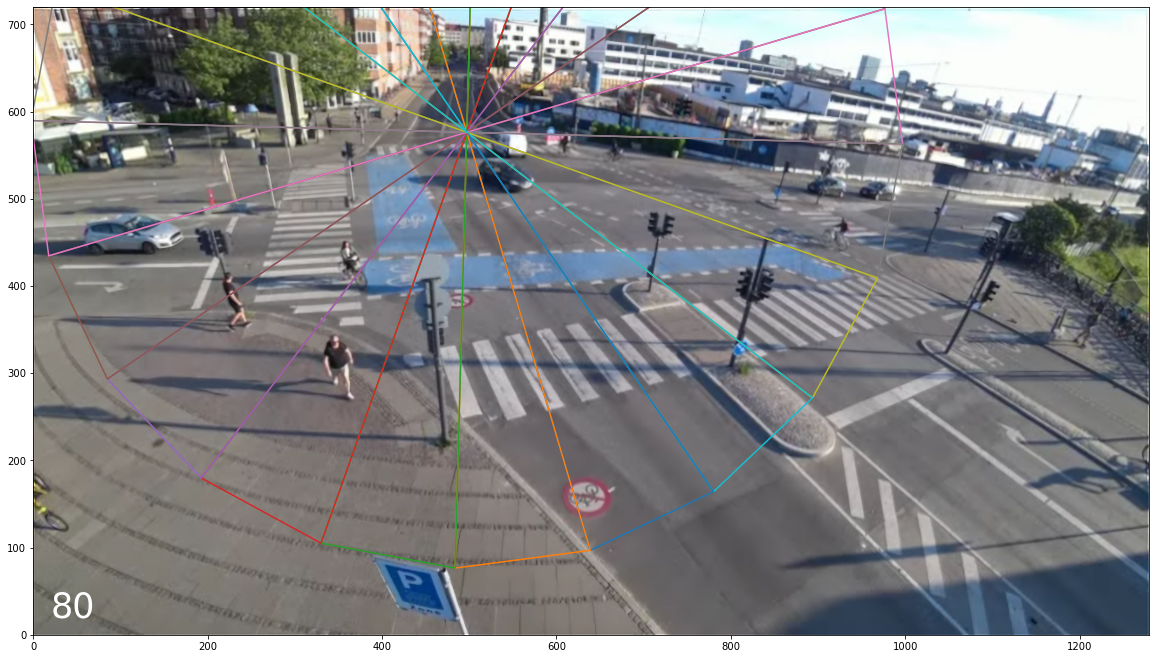

In [207]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
img = Image.open("intersection2.png")
img = ImageOps.flip(img)

im = ax.imshow(img, origin='lower')
txt = ax.text(20,20, '', fontsize=35, color='w')
sc = ax.scatter([], [], s=200)
ln = [ax.plot([],[])[0] for _ in range(20)]
patches = ln + [sc] + [txt]

def init():
    return patches

def update(frame):
    txt.set(text=str(frame))
    
    sc.set_offsets([[row['x'][frame], row['y'][frame]]])
    
    for i in range(20):
        x,y = row['zone_'+str(i)][frame].exterior.xy
        ln[i].set_data(x,y)
    
    return patches

ani = FuncAnimation(fig, update, frames=np.arange(0,81),    # np.arange(0, 12000, 10), # interval=30,
                    init_func=init)#, blit=True)

Writer = writers['ffmpeg']
writer = Writer(fps=6) # , bitrate=1800)
ani.save('movies/zone_test.mp4', writer)

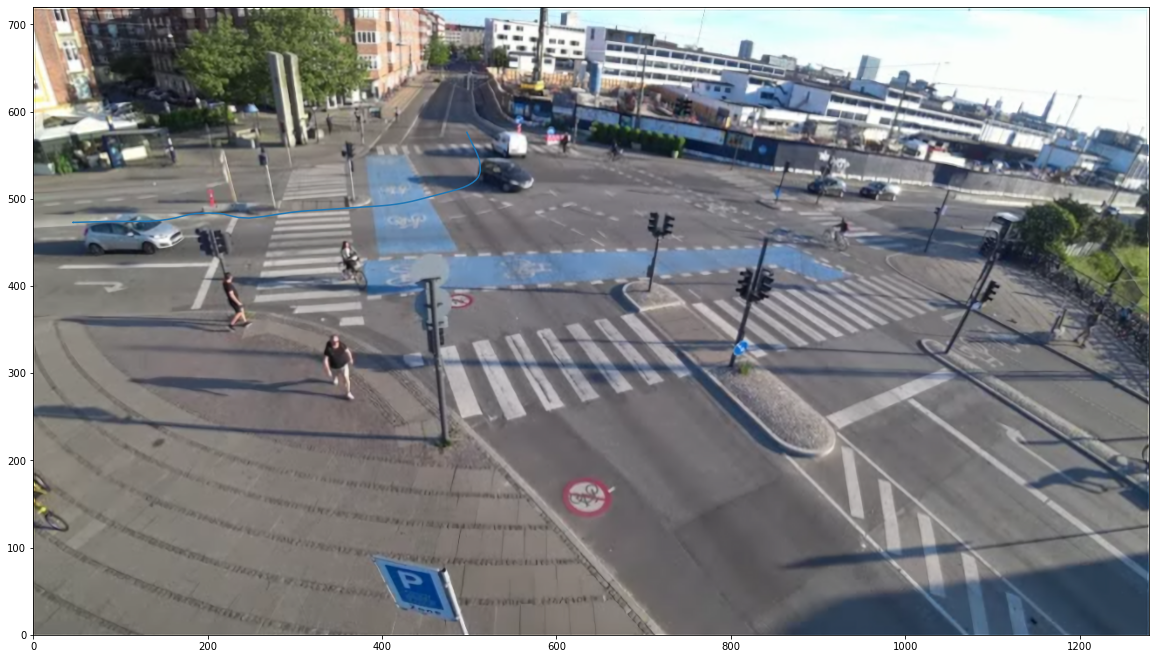

In [203]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
img = Image.open("intersection2.png")
img = ImageOps.flip(img)
im = ax.imshow(img, origin='lower')

row = pdf.iloc[12]
ax.plot(row['x'], row['y'])

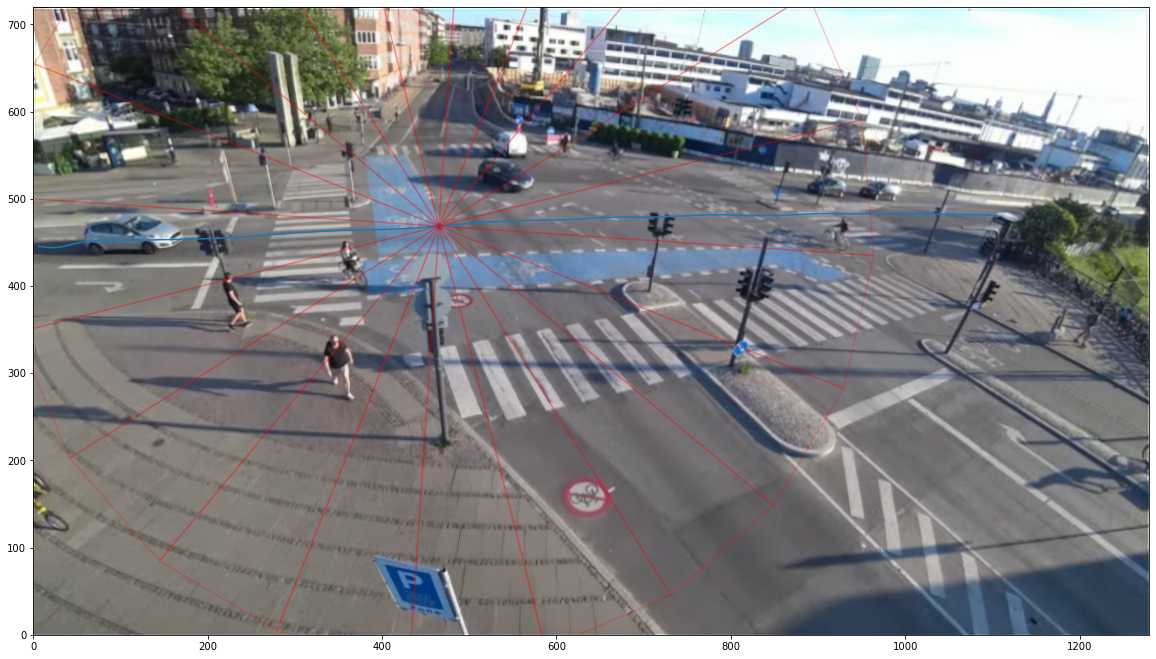

In [30]:
import pickle
with open('data/pdf.pkl', 'rb') as f:
    pdf = pickle.load(f)
    
row = pdf.iloc[0]
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
img = Image.open("intersection2.png")
img = ImageOps.flip(img)
im = ax.imshow(img, origin='lower')

i = 200
ax.plot(row['x'], row['y'])
ax.scatter(row['x'][i], row['y'][i])
for zone in ['zone_'+str(n) for n in range(20)]:
    x,y = row[zone][i].exterior.xy
    ax.plot(x,y, c='r', alpha=0.2)